In [1]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the nwb files
filename = '..//data//NWBFile//S25_210913.nwb'

io = NWBHDF5IO(filename,'r')
nwbfile = io.read()


In [3]:
nwb2widget(nwbfile)

C:\Users\sprince7\Anaconda3\envs\singer-lab-to-nwb\lib\site-packages\nwbwidgets\ecephys.py:37: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  elec_pos = np.hstack(np.arange(count).tolist() for count in counts)


IndexError: tuple index out of range

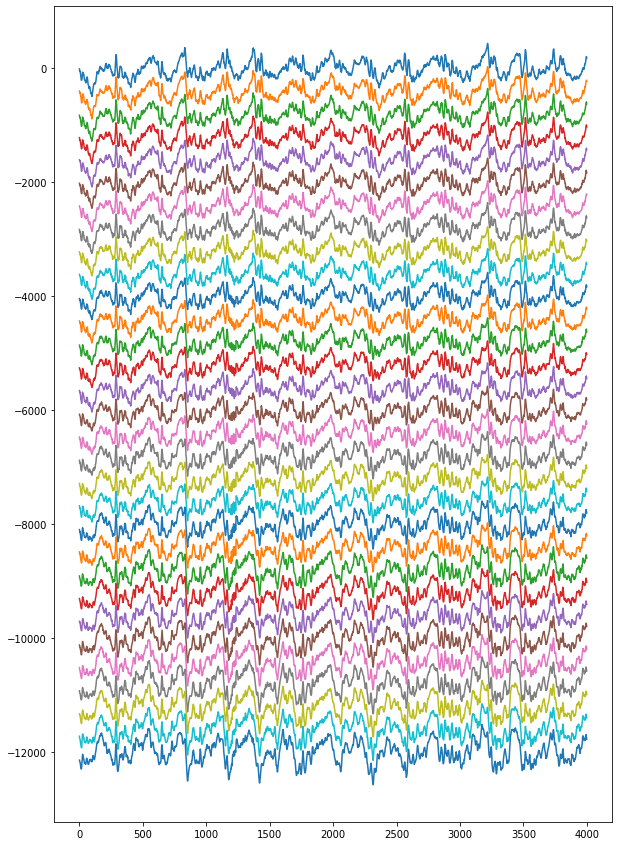

In [15]:
# plot the LFP data
lfp_data = nwbfile.processing['ecephys']['LFP']['LFP'].data[0:4000, :]
fig = plt.figure(figsize=(10,15))
for ch in range(31):
    plt.plot(lfp_data[:,ch]-400*ch)

plt.show()

In [27]:
band_df = nwbfile.processing['ecephys']['decomposition_envelope'].bands.to_dataframe()
band_df

,band_name,band_limits
id,,
0,delta,"[1, 4]"
1,theta,"[4, 12]"
2,beta,"[12, 30]"
3,lowgamma,"[20, 50]"
4,ripple,"[150, 250]"


In [29]:
band_df['band_name'][0]

'delta'

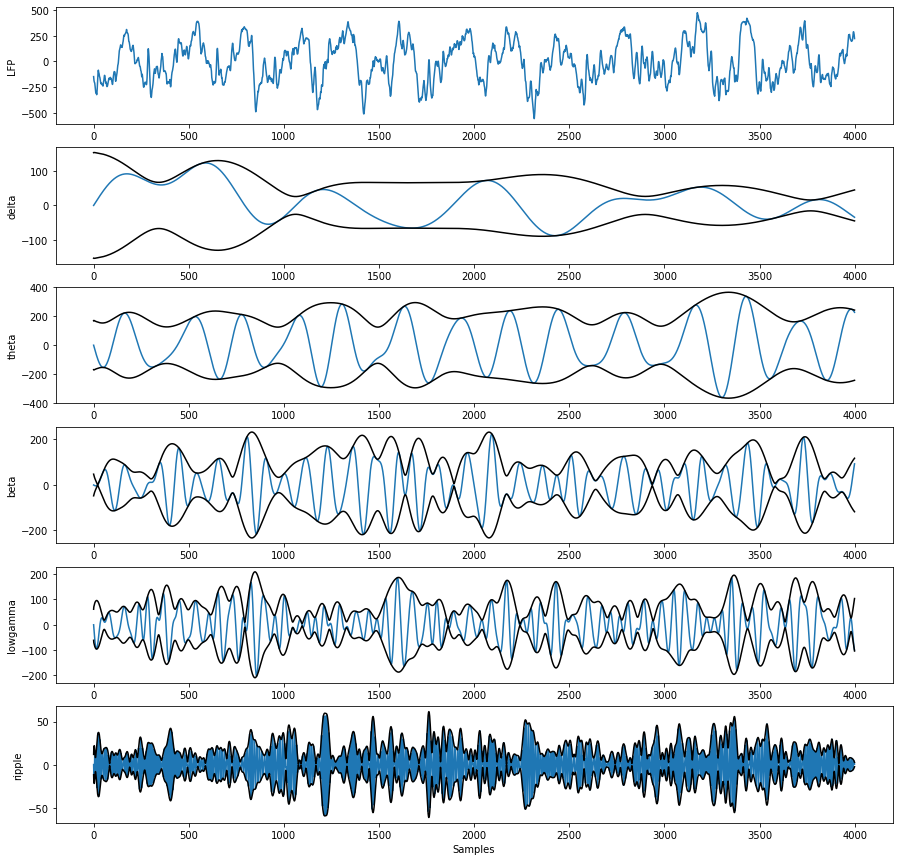

In [37]:
#plot decomposition series data
data_amp = nwbfile.processing['ecephys']['decomposition_amplitude'].data[0:4000, 31, 0:5]
data_phase = nwbfile.processing['ecephys']['decomposition_phase'].data[0:4000, 31, 0:5]
data_env = nwbfile.processing['ecephys']['decomposition_envelope'].data[0:4000, 31, 0:5]
bands = nwbfile.processing['ecephys']['decomposition_envelope']

fig, axes = plt.subplots(6, 1, figsize=(15,15))

# plot lfp
axes[0].plot(lfp_data[:,31])
axes[0].set_ylabel('LFP')

# plot frequency bands
for band in range(5):
    axes[band+1].plot(data_amp[:,band])
    axes[band+1].plot(data_env[:,band], color='k')
    axes[band+1].plot(-1*data_env[:,band], color='k')
    axes[band+1].set_ylabel(band_df['band_name'][band])

axes[band+1].set_xlabel('Samples')

plt.show()

In [ ]:
# plot the behavioral and digital data
